In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Load dataset
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
# Remove duplicates
df = df.drop_duplicates()
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
# Check object type columns, prepare to convert it. Will drop route and booking_origin columns
print("sales_channel: \n", df['sales_channel'].unique(), "\n",
      "trip_type: \n", df['trip_type'].unique(), "\n",
      "flight_day: \n", df["flight_day"].unique(), "\n",
      "route: \n", df["route"].unique(), "\n",
      "booking_origin: \n", df["booking_origin"].unique(), "\n")

sales_channel: 
 ['Internet' 'Mobile'] 
 trip_type: 
 ['RoundTrip' 'CircleTrip' 'OneWay'] 
 flight_day: 
 ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri'] 
 route: 
 ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS'

In [ ]:
# Using one hot encoder for non ordinal column (https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

df_encoded = pd.get_dummies(df, columns = ['sales_channel', 'trip_type'])
print(df_encoded)

df_encoded

       num_passengers  purchase_lead  length_of_stay  flight_hour flight_day  \
0                   2            262              19            7        Sat   
1                   1            112              20            3        Sat   
2                   2            243              22           17        Wed   
3                   1             96              31            4        Sat   
4                   2             68              22           15        Wed   
...               ...            ...             ...          ...        ...   
49995               2             27               6            9        Sat   
49996               1            111               6            4        Sun   
49997               1             24               6           22        Sat   
49998               1             15               6           11        Mon   
49999               1             19               6           10        Thu   

        route booking_origin  wants_ext

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1
49996,1,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,1,0,0,0,1
49997,1,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,1,0,0,0,1
49998,1,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1


In [ ]:
# Using ordinary encoder for days
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df_encoded["flight_day"] = df_encoded["flight_day"].map(mapping)

In [ ]:
df_encoded.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977,0.891155,0.108845,0.002354,0.007833,0.989814
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052,0.311448,0.311448,0.048460,0.088156,0.100414
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_encoded = df_encoded.drop(["route", "booking_origin"], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

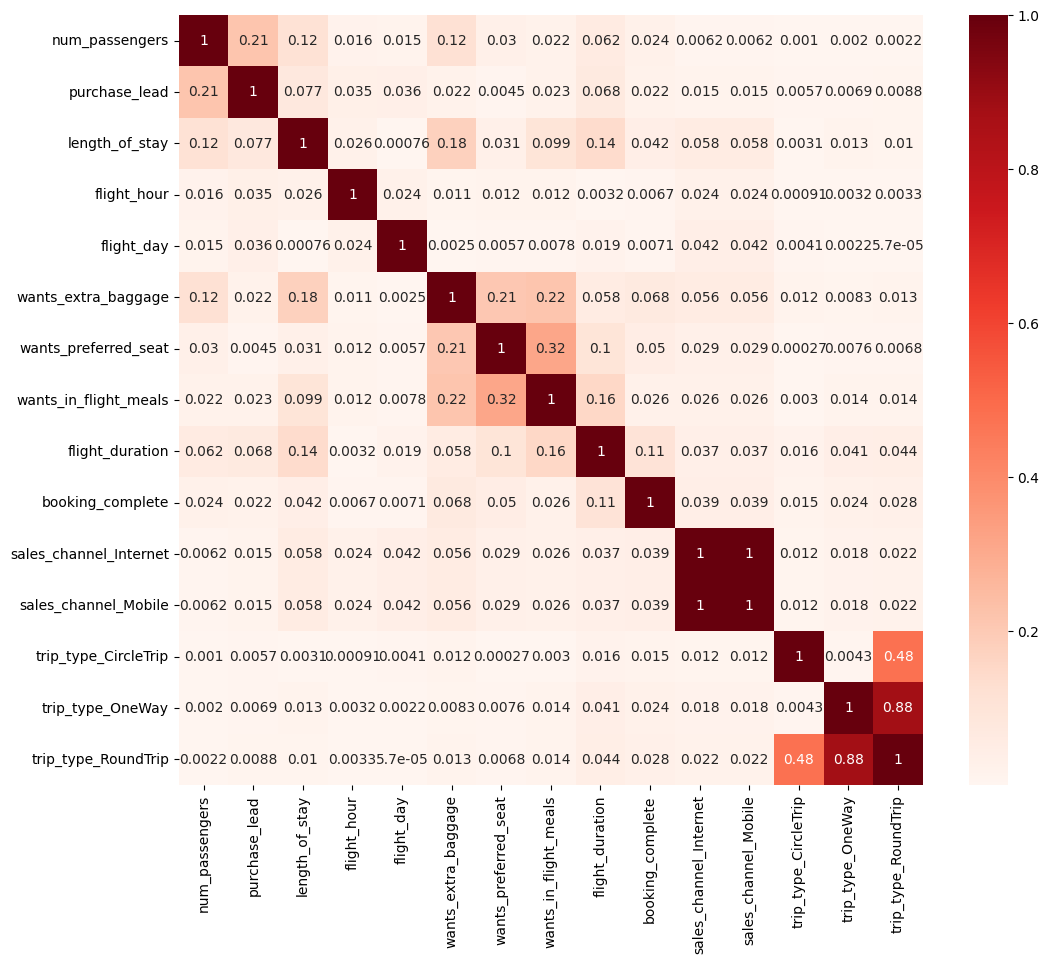

In [ ]:
# Here we have a correlation matrix heatmap with all columns
corr_matrix = df_encoded.corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show

In [ ]:
correlation_with_target = corr_matrix['booking_complete'].sort_values(ascending=False)
correlation_with_target

booking_complete          1.000000
flight_duration           0.106529
wants_extra_baggage       0.068452
wants_preferred_seat      0.050189
length_of_stay            0.042080
sales_channel_Internet    0.039320
sales_channel_Mobile      0.039320
trip_type_RoundTrip       0.028462
wants_in_flight_meals     0.026399
trip_type_OneWay          0.024428
num_passengers            0.024092
purchase_lead             0.022132
trip_type_CircleTrip      0.014539
flight_day                0.007061
flight_hour               0.006705
Name: booking_complete, dtype: float64

In [ ]:
# Prep for training the predictive model
# We will use all predictor variables first then evaluate the model
X = df_encoded.drop(['booking_complete'], axis=1)
y = df_encoded['booking_complete']

# Spliting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Check imbalance data for Y label
df_encoded['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [ ]:
# define the model and adjust weight with balanced since the frequency of each class is imbalance
rf_default = RandomForestClassifier(class_weight="balanced")
rf_default.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
# Evaluate with accuracy of Y test data
Y_pred_default = rf_default.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_default)
print("Accuracy:", accuracy)

Accuracy: 0.8487135784433082


In [ ]:
# Adjust random forest model to adjust the weight to be balance

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(class_weight="balanced")

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=35,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=35,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x798fb7112560>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x798fb65659f0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 441}


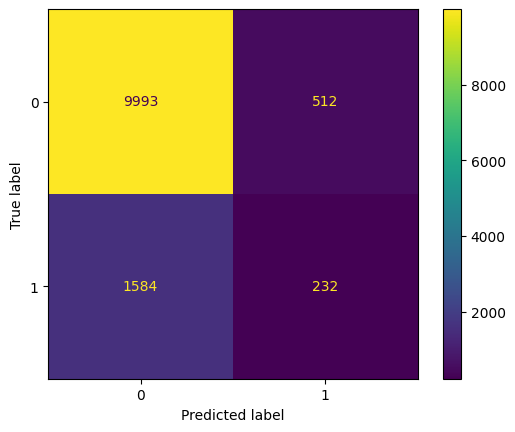

In [ ]:
# Evaluate model
Y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
# Evaluate with accuracy, precision, and recall
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8275302329356383
Precision: 0.30318471337579617
Recall: 0.13105726872246695


In [ ]:
# Seems after hyperparameter tuning with RandomizedSearchCV the accuracy is not improved from using the default model
# Now let's check the parameters of the default model that we use before, then check the evaluation metrics
params = rf_default.get_params()

# Print the parameters
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

Model Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


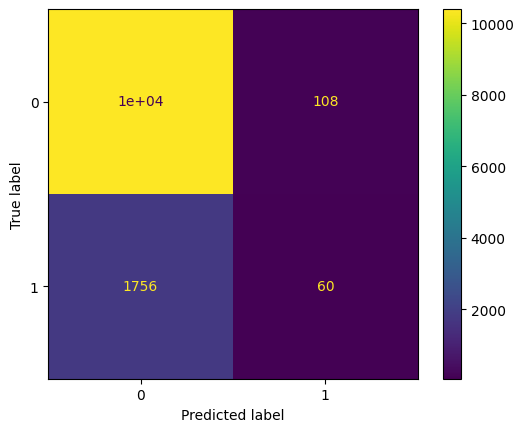

In [ ]:
# Evaluate model
Y_pred_default = rf_default.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_default)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
# The confusion metric of default model seems have less number of false positive and true negative than the other one model
# Even the recall of default model is less, both of them are still have low percentage of recall
# Evaluate with accuracy, precision, and recall
accuracy = accuracy_score(Y_test, Y_pred_default)
precision = precision_score(Y_test, Y_pred_default)
recall = recall_score(Y_test, Y_pred_default)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8487135784433082
Precision: 0.35714285714285715
Recall: 0.03303964757709251


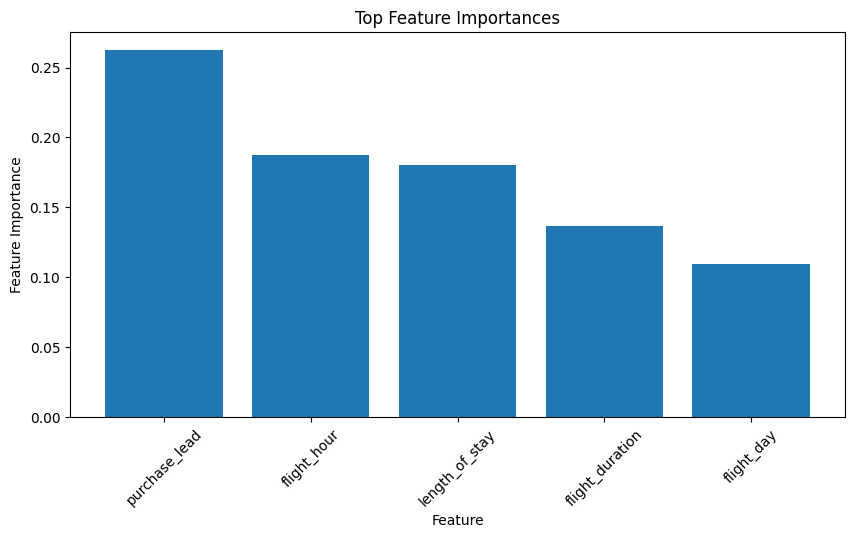

In [ ]:
# Visualize performance
import matplotlib.pyplot as plt

feature_importances = rf_default.feature_importances_

# Assuming a list of feature names stored in feature_names
# Replace it with the actual feature names in your dataset
feature_names = df_encoded.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot the top N feature importances
top_n = 5
plt.figure(figsize=(10, 5))
plt.bar(range(top_n), feature_importances[sorted_indices[:top_n]], align='center')
plt.xticks(range(top_n), feature_names[sorted_indices[:top_n]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importances')
plt.show()
